# Telecom churn project


In the telecommunication industry, getting a new customer base cost more than holding the current customers. Therefore, churn is the process of customer changing from one firm to another in a given a time. Churn can lead to financial loss, making customer retention strategies crucial. We assume that the goal of the company is to retain the customers creating a better experience for the users, the machine learning problem is to find a model that can predict churn, therefore we have a classification problem. The business success criteria is being able to retain the leaving customers or at least having a broader view of the factors surrounding their choice of staying or leaving.

## Dictionary of the variables

• CHURN: Indicates whether the user leaves the company or not.

• ACCOUNTLENGTH: Refers to the duration of accounts.

• INTERNATIONALPLAN: Indicates if the customer has registered for a plan with international calls and messages.

• VOICEMAILPLAN: Indicates if the customer has registered for a plan with voicemail.

• NUMBERVMAILMESSAGES: Indicates the number of voicemail messages the customer has made.

• TOTALDAYMINUTES: Indicates the total number of minutes the customer spoke during the day.

• TOTALDAYCALLS: Indicates the number of calls the user made daily.

• TOTALDAYCHARGE: Indicates the amount the user will pay for calls or messages made during the day.

• TOTALEVEMINUTES: Indicates the total number of minutes the user has talked.

• TOTALEVECALLS: Indicates the total number of calls the user has made.

• TOTALEVECHARGE: Indicates the amount the user will pay for calls or messages made.

• TOTALNIGHTMINUTES: Indicates the number of minutes talked during the night.

• TOTAL NIGHT CALLS: Indicates the number of calls made by the user during the night.

• TOTAL NIGHT CHARGE: Indicates the number of charges the user incurs at night for making calls or sending messages.

• TOTAL INTL MINUTES: Indicates the number of minutes the user has spoken with family or friends abroad.

• TOTAL INTL CALLS: Indicates the number of calls the user has made when calling abroad.

• TOTAL INTL CHARGE: Economic amount that the user will have to pay for messages and calls abroad.

• CUSTOMER SERVICE CALLS: Indicates the number of calls the user made to the company's customer service personnel to report a complaint or concern.

## 2. Data Understanding

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

telecom= pd.read_csv('Long_Assignment/churn_data.csv')
telecom.head(10)

# warnings.filterwarnings("ignore")

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128.0,no,yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,No,107.0,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,No,137.0,no,no,0.0,243.4,NaN,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,No,84.0,yes,no,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,No,75.0,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
5,No,118.0,yes,no,0.0,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0
6,No,121.0,no,yes,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0
7,No,147.0,yes,no,0.0,157.0,79.0,26.69,103.1,94.0,8.76,211.8,96.0,9.53,7.1,6.0,1.92,0.0
8,No,117.0,no,no,0.0,184.5,97.0,31.37,351.6,80.0,29.89,215.8,90.0,9.71,8.7,4.0,2.35,1.0
9,No,141.0,yes,yes,37.0,258.6,84.0,43.96,222.0,111.0,18.87,326.4,97.0,14.69,11.2,5.0,3.02,0.0


In [ ]:
print(telecom.dtypes)

for col in telecom.columns:
    if telecom[col].dtype == 'object':
        print(f"Unique values in {col}: {telecom[col].unique()}")


churn                          object
accountlength                 float64
internationalplan              object
voicemailplan                  object
numbervmailmessages           float64
totaldayminutes               float64
totaldaycalls                 float64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                 float64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls               float64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                float64
totalintlcharge               float64
numbercustomerservicecalls    float64
dtype: object
Unique values in churn: ['No' 'Yes']
Unique values in internationalplan: ['no' 'yes' nan]
Unique values in voicemailplan: ['yes' 'no' nan]


In [3]:
telecom.count()

churn                         5000
accountlength                 4951
internationalplan             4950
voicemailplan                 4950
numbervmailmessages           4950
totaldayminutes               4950
totaldaycalls                 4950
totaldaycharge                4950
totaleveminutes               4950
totalevecalls                 4950
totalevecharge                4950
totalnightminutes             4950
totalnightcalls               4950
totalnightcharge              4950
totalintlminutes              4950
totalintlcalls                4950
totalintlcharge               4950
numbercustomerservicecalls    4950
dtype: int64

In [4]:
telecom.count()/telecom.shape[0]

churn                         1.0000
accountlength                 0.9902
internationalplan             0.9900
voicemailplan                 0.9900
numbervmailmessages           0.9900
totaldayminutes               0.9900
totaldaycalls                 0.9900
totaldaycharge                0.9900
totaleveminutes               0.9900
totalevecalls                 0.9900
totalevecharge                0.9900
totalnightminutes             0.9900
totalnightcalls               0.9900
totalnightcharge              0.9900
totalintlminutes              0.9900
totalintlcalls                0.9900
totalintlcharge               0.9900
numbercustomerservicecalls    0.9900
dtype: float64

### Preliminary analysis

In [5]:
telecom.describe()
#Statistical summary of the numerical columns

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,4951.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
mean,100.238295,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,39.718817,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Categorical variables (Binary)

In [ ]:
# Select only categorical columns

df = telecom.copy(deep=True)
categorical_columns = df.select_dtypes(include='object')
categorical_columns.head(3)

,churn,internationalplan,voicemailplan
0,No,no,yes
1,No,no,yes
2,No,no,no


### Non categorical variables (Continuous / Numeric Variables)

In [ ]:
# Select only non categorical columns

non_categorical_columns = df.select_dtypes(include='float64')
non_categorical_columns.head(3)

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,137.0,0.0,243.4,NaN,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0


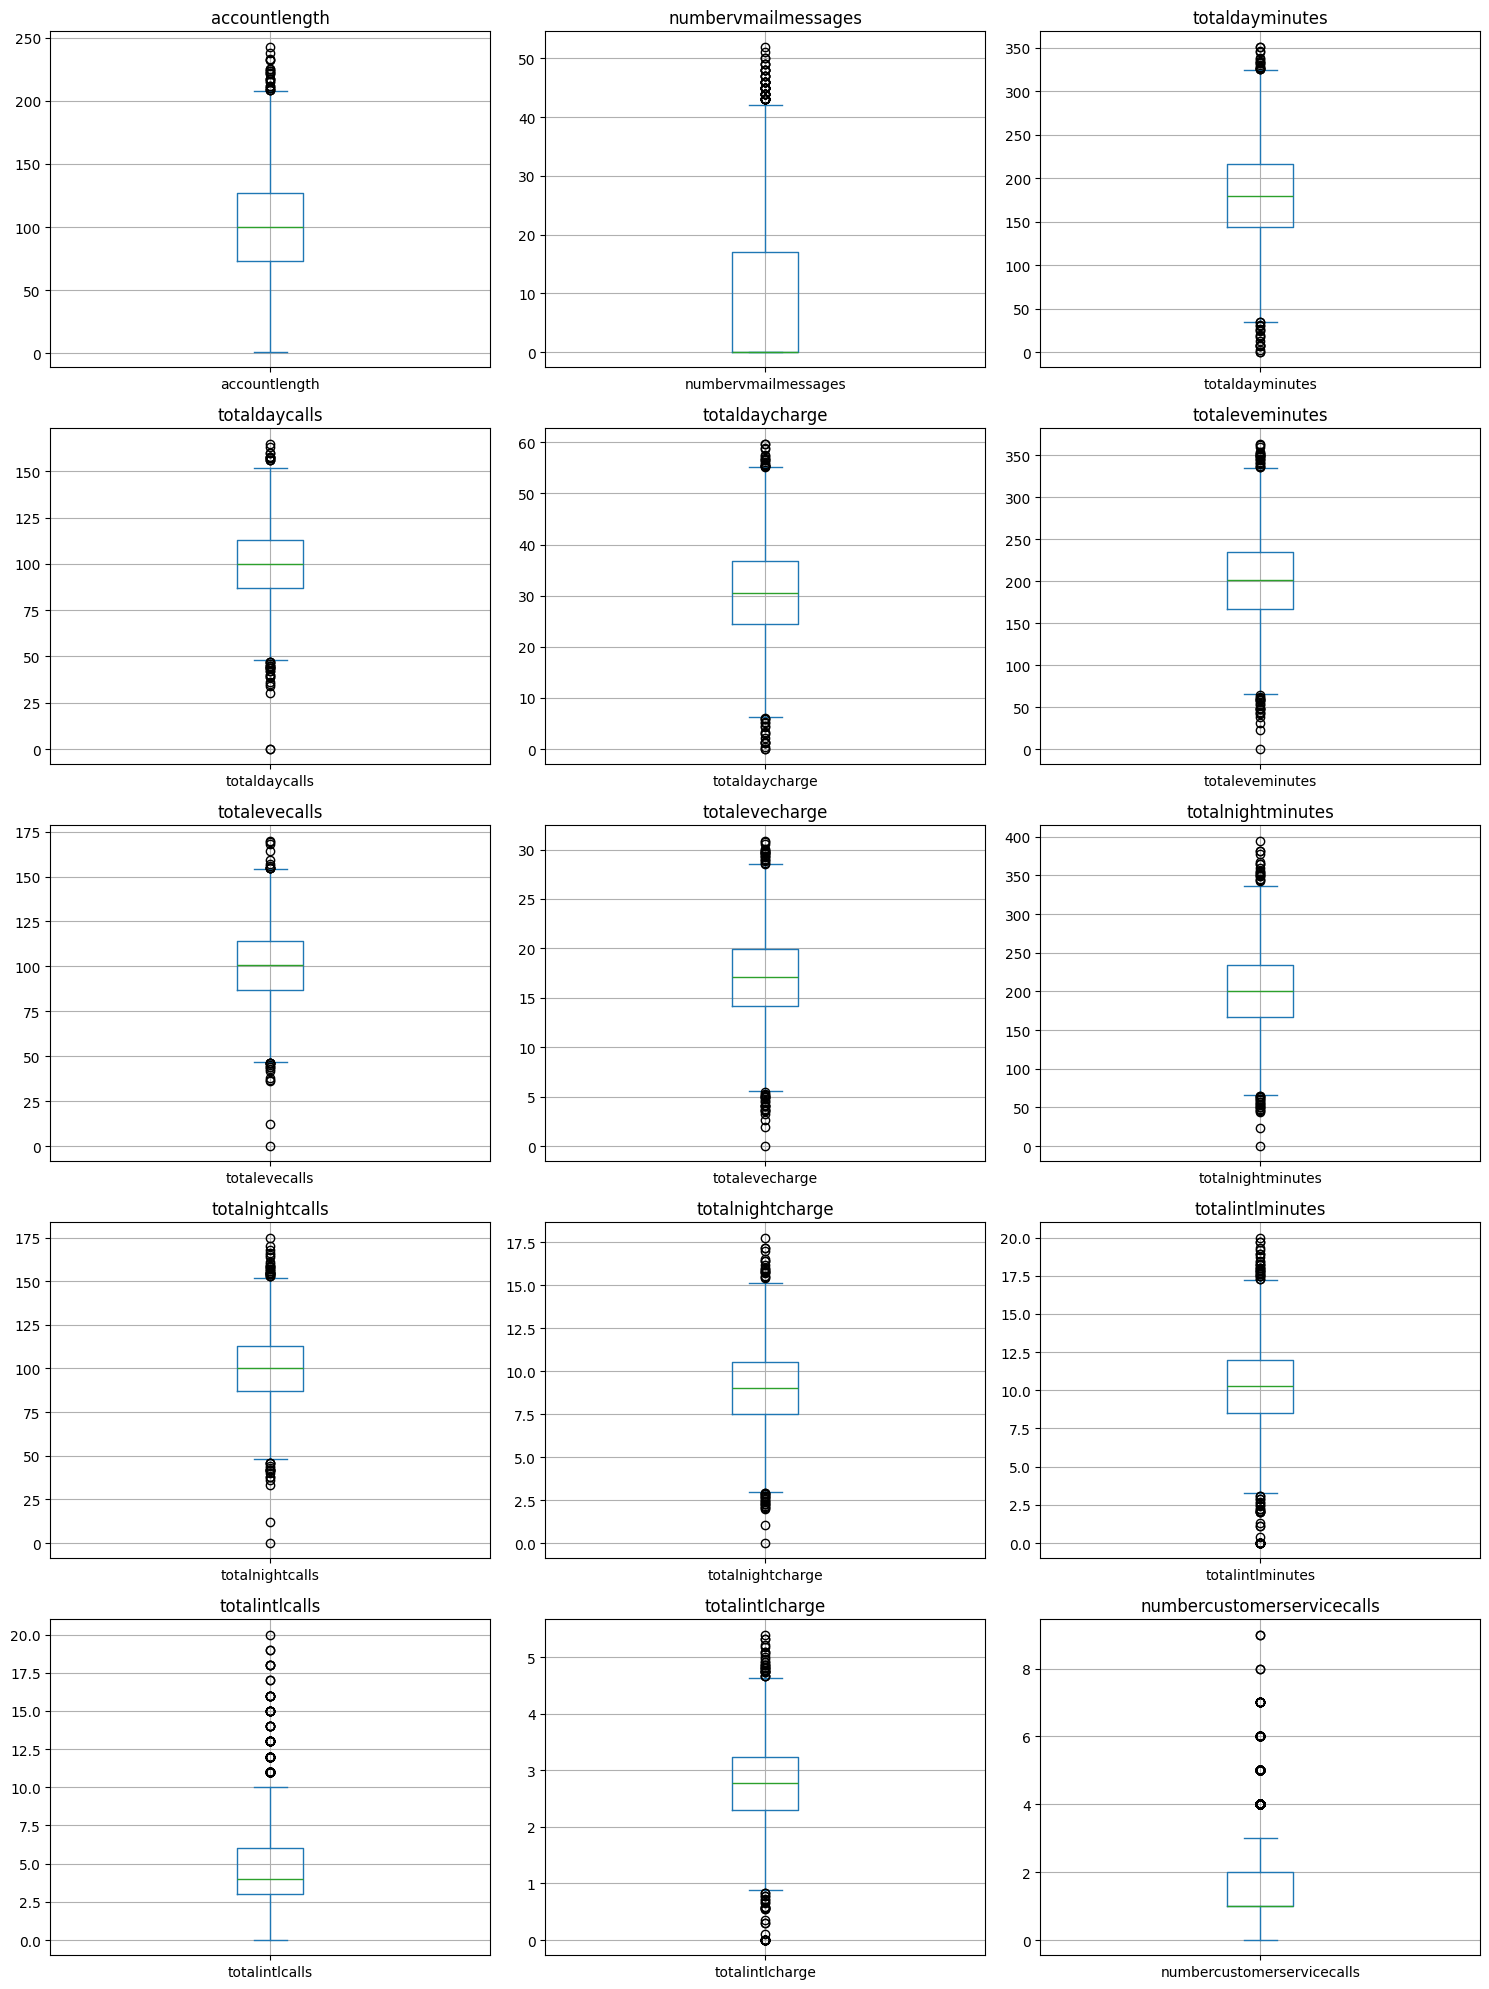

In [8]:
# Looking for strange values

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, col in enumerate(non_categorical_columns.columns):
    row_index = i // 3
    col_index = i % 3
    non_categorical_columns[col].plot.box(ax=axes[row_index, col_index], label=col)
    axes[row_index, col_index].set_title(f'{col}')
    axes[row_index, col_index].grid(True)

plt.tight_layout()  
plt.show()


Looking to the outliers in this distribution, it doesn't make sense to filter them at first. It represents continuous data of some of the behaviors of our clients. Most of the outliers are squeezed together, but even those that are isolated represent important information for us. We want to consider all the data of, for instance, those who called too much, and those who called too little. Apart from that, we also have some columns such as "numbercustomerservicecalls" that each value represents the number of calls made by the client to the company. According to the data, clients that have called more than 4 times are considered outliers. We need to evaluate and consider those who called many times, so it is wise not to exclude any of these outliers.

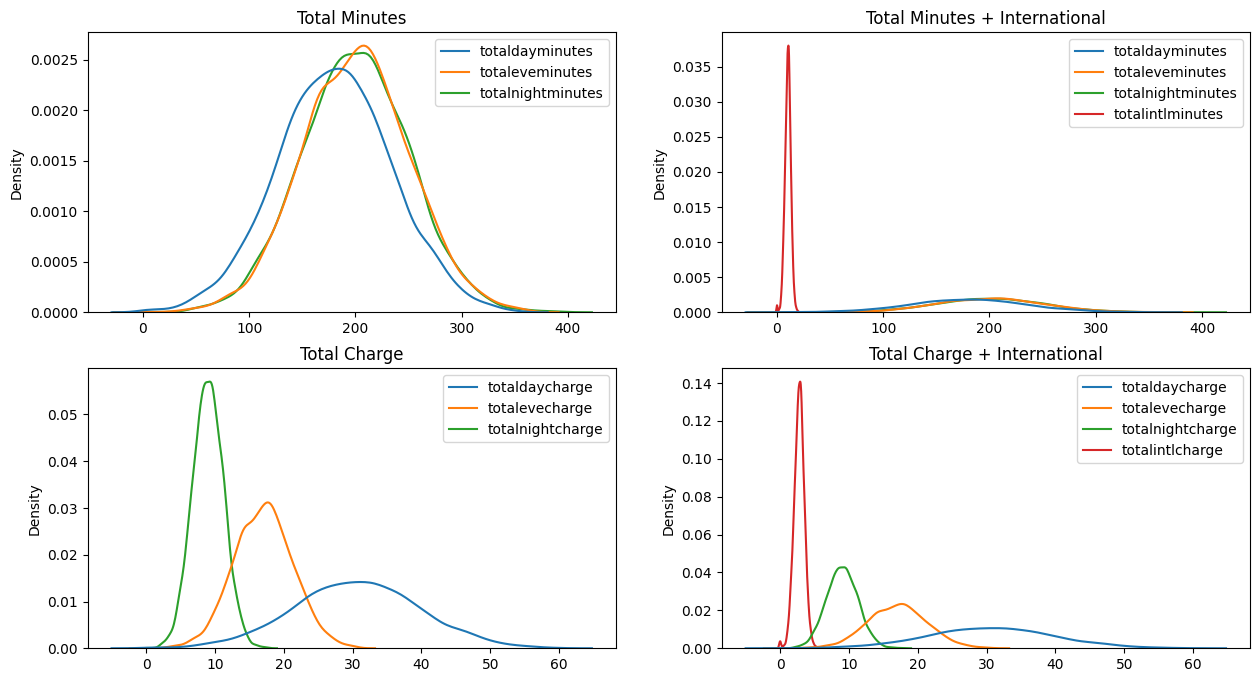

In [10]:
# Density plot 

from sklearn import preprocessing

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

sns.kdeplot(data=non_categorical_columns.iloc[:,[2,5,8]],ax=axes[0,0])
axes[0, 0].set_title('Total Minutes')

sns.kdeplot(data=non_categorical_columns.iloc[:,[2,5,8,11]],ax=axes[0,1])
axes[0, 1].set_title('Total Minutes + International')

sns.kdeplot(data=non_categorical_columns.iloc[:,[4,7,10]],ax=axes[1,0])
axes[1, 0].set_title('Total Charge')

sns.kdeplot(data=non_categorical_columns.iloc[:,[4,7,10,13]],ax=axes[1,1])
axes[1, 1].set_title('Total Charge + International')


Total charge and total minutes graphics show an interesting fact, even though the amount of minutes has a similar distribution the total charge does not have, the day charge has a very wide range. Total night charge is 
skewed to the left.
Another thing to analyse is the international plan and total charge that is skewed to the left as well. Even more when compared to the other features.

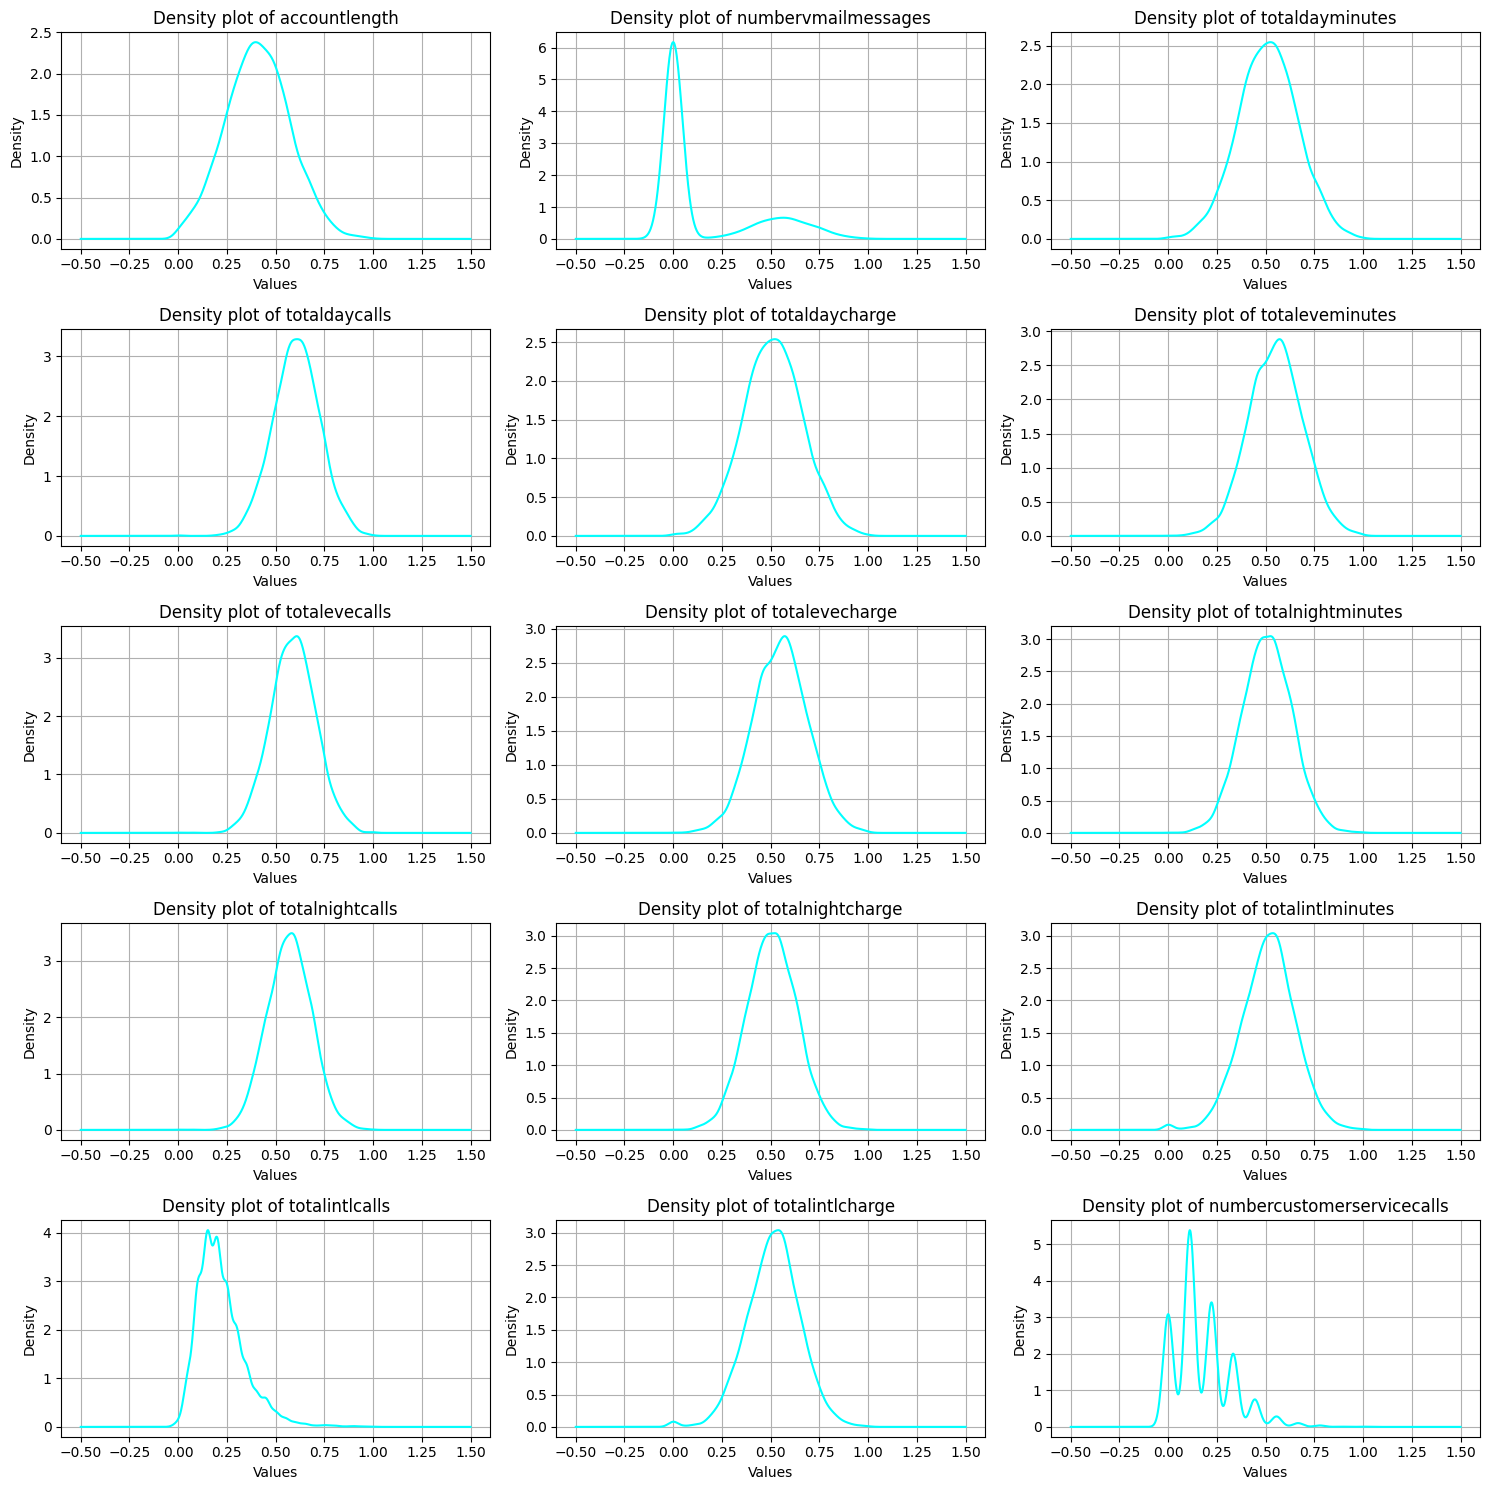

In [ ]:
# With normalized data

from sklearn.preprocessing import MinMaxScaler

# Creating a new df to not modify the main data
normalized_df = telecom.copy(deep=True)

cols_to_normalize = ['accountlength','numbervmailmessages','totaldayminutes','totaldaycalls', 'totaldaycharge','totaleveminutes','totalevecalls','totalevecharge','totalnightminutes','totalnightcalls','totalnightcharge','totalintlminutes','totalintlcalls','totalintlcharge','numbercustomerservicecalls']
scaler = MinMaxScaler()

normalized_df[cols_to_normalize] = scaler.fit_transform(telecom[cols_to_normalize])

# Now the density plot 

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

colors = ['cyan'] * 15

for i, col in enumerate(cols_to_normalize):
    row_index = i // 3
    col_index = i % 3
    normalized_df[col].plot.density(color=colors[i], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Density plot of {col}')
    axes[row_index, col_index].set_xlabel('Values')
    axes[row_index, col_index].set_ylabel('Density')
    axes[row_index, col_index].grid(True)

plt.tight_layout()
plt.show()

'''Resultados muito similares como a Analu disse. Sem nenhum insight novo, vamos tirar o gráfico?''';

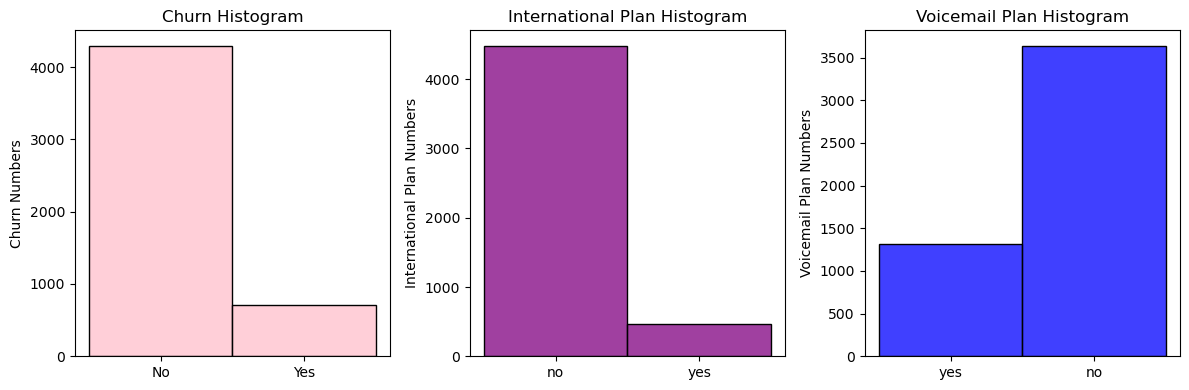

In [ ]:
# Density plot cathegorical variables

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns for three plots side by side

# Churn 
sns.histplot(categorical_columns['churn'], bins=5, kde=False, color='pink', ax=axs[0])
axs[0].set_title('Churn Histogram')
axs[0].set_xlabel('')
axs[0].set_ylabel('Churn Numbers')

# International plan histogram
sns.histplot(categorical_columns['internationalplan'], bins=5, kde=False, color='purple', ax=axs[1])
axs[1].set_title('International Plan Histogram')
axs[1].set_xlabel('')
axs[1].set_ylabel('International Plan Numbers')

# Voicemail plan histogram
sns.histplot(categorical_columns['voicemailplan'], bins=5, kde=False, color='blue', ax=axs[2])
axs[2].set_title('Voicemail Plan Histogram')
axs[2].set_xlabel('')
axs[2].set_ylabel('Voicemail Plan Numbers')

plt.tight_layout()
plt.show()




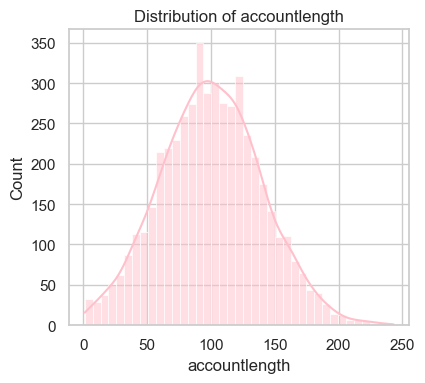

In [15]:
# Distribution of account length plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(telecom['accountlength'], kde=True, color='pink')
plt.title('Distribution of accountlength')


plt.tight_layout()
plt.show()

### The visualizations provide insights into key aspects of the dataset:
    Distribution of Account length: The distribution shows a concentration between 80-150 indicating a good number of clients that are loyal to the company. There is a small number between 0-50 indicating new clients.



### Correlation Analysis

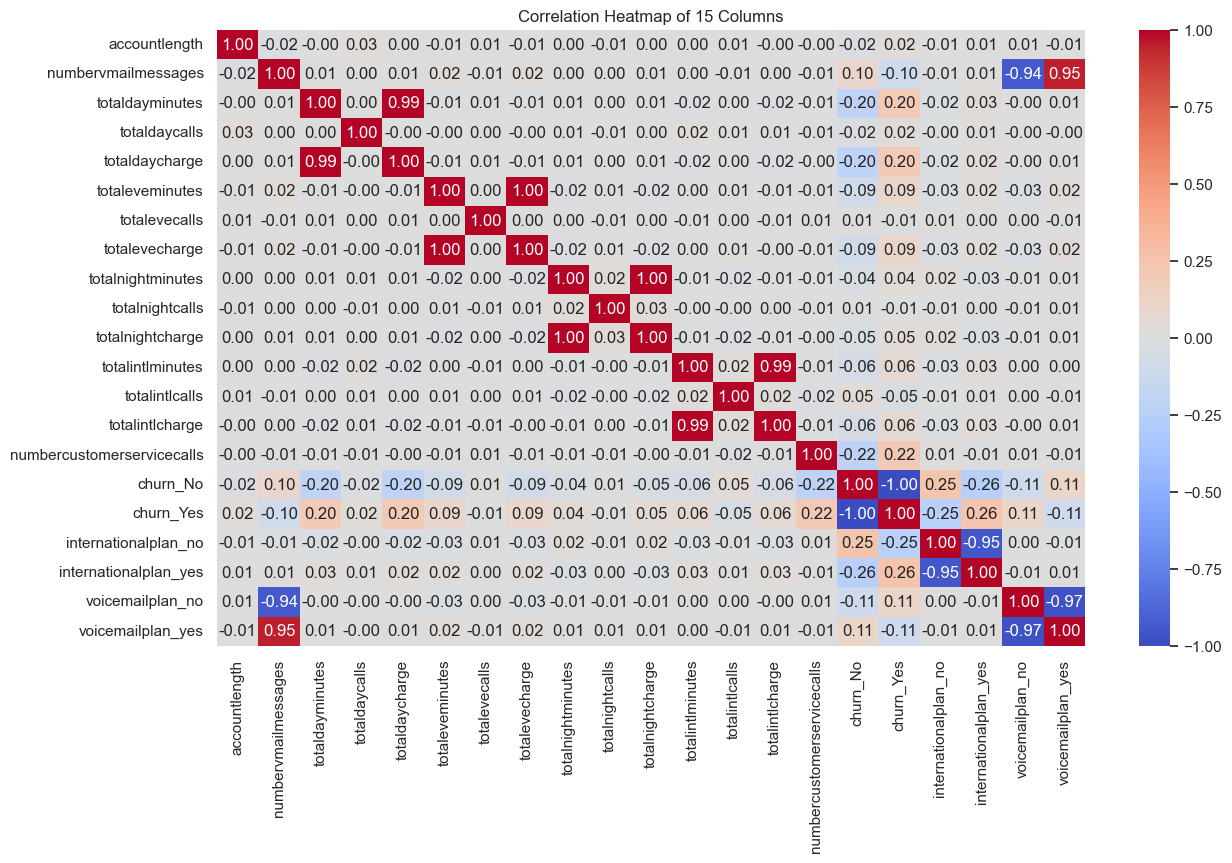

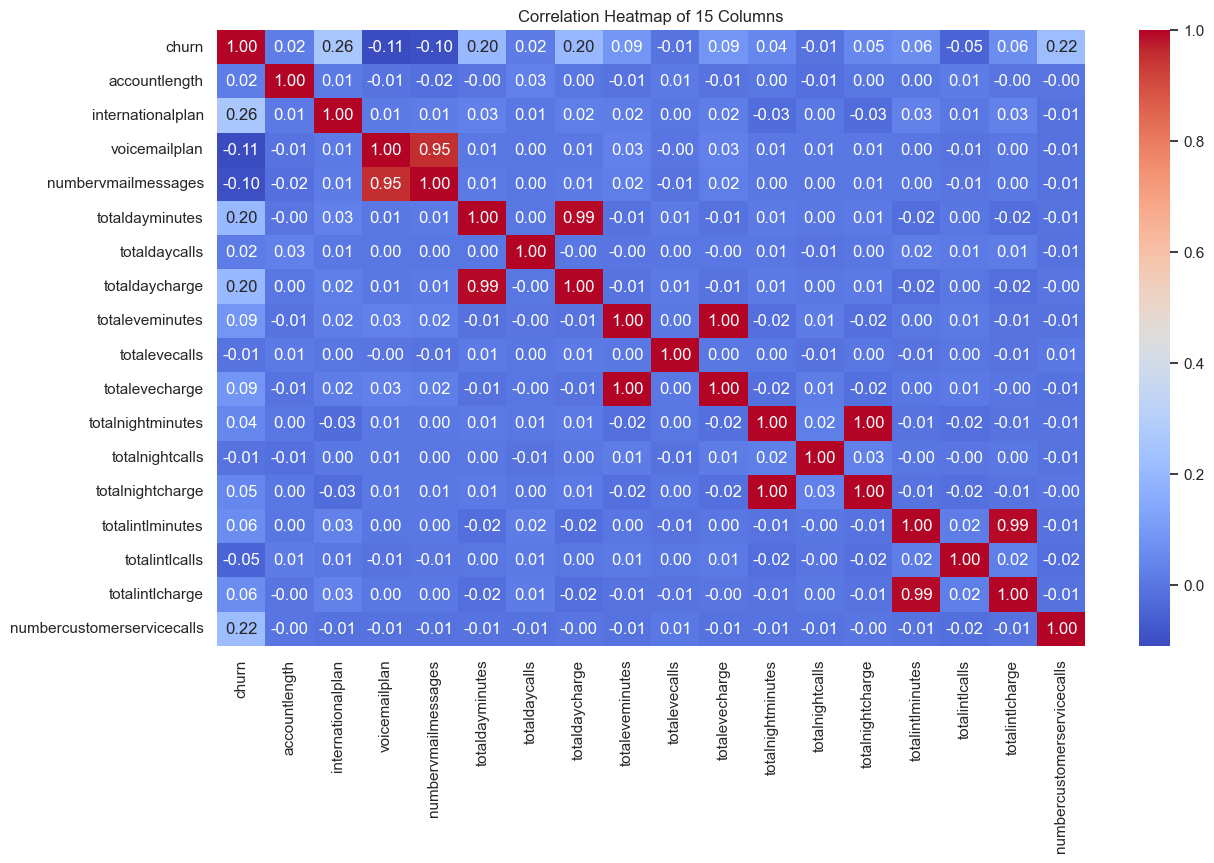

In [16]:

# Correlation raw data
telecom_dummies = pd.get_dummies(telecom) 

correlations = telecom_dummies.corr(numeric_only=True)
plt.figure(figsize=(14, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of 15 Columns')
plt.show()


# Now lets try making another correlation map but changing the values from yes to 1 and no to 0, without the dummies
telecom_binary = telecom.copy(deep=True)
telecom_binary['churn'] = telecom_binary['churn'].replace({'Yes': 1, 'No': 0})
telecom_binary['internationalplan'] = telecom_binary['internationalplan'].replace({'yes': 1, 'no': 0})
telecom_binary['voicemailplan'] = telecom_binary['voicemailplan'].replace({'yes': 1, 'no': 0})

corr = telecom_binary.corr(numeric_only=True)
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of 15 Columns')
plt.show()


C:\Users\laura\AppData\Local\Temp\ipykernel_7292\3964975313.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_accountlength = telecom.groupby(accountlength_bins)['churn'].value_counts(normalize=True).unstack() * 100


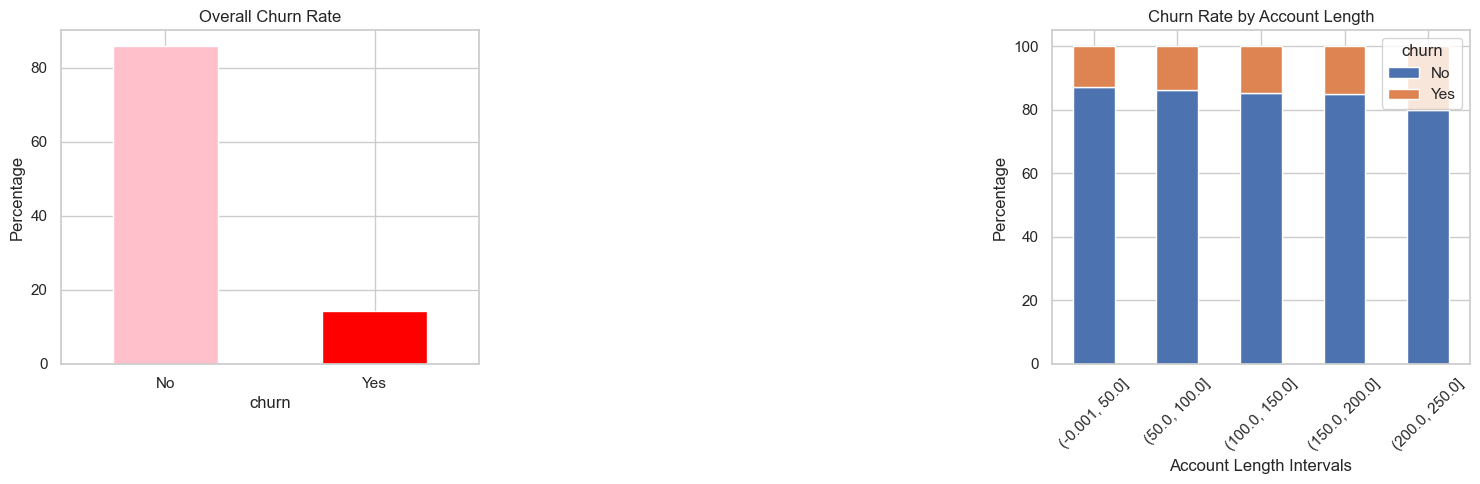

In [17]:
# Comparing churn with account length

churn_rate = percentage_distribution_churn

accountlength_bins = pd.cut(telecom['accountlength'], bins=[0, 50, 100, 150, 200, 250], include_lowest=True)
churn_by_accountlength = telecom.groupby(accountlength_bins)['churn'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
churn_rate.plot(kind='bar', color=['pink', 'red'])
plt.title('Overall Churn Rate')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
churn_by_accountlength.plot(kind='bar', stacked=True, ax=plt.gca()) 
plt.title('Churn Rate by Account Length')
plt.ylabel('Percentage')
plt.xlabel('Account Length Intervals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The visualizations provide a detailed analysis of the churn rates in the dataset:

Overall Churn Rate: While there is a notable difference in the proportions of customers who have churned compared to those who have not, it's evident that the churn rate, although substantial, is relatively lower than the rate of customers who have stayed or not churned. This implies that a considerable portion of customers have remained with the service, contributing to a higher retention rate in comparison to those who have discontinued their services.

Churn Rate by Account length: Very little difference between account lentghs.


C:\Users\laura\AppData\Local\Temp\ipykernel_7292\676054567.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_totaldaycharge = telecom.groupby(totaldaycharge_bins)['churn'].value_counts(normalize=True).unstack() * 100
C:\Users\laura\AppData\Local\Temp\ipykernel_7292\676054567.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_totaldayminutes = telecom.groupby(totaldayminutes_bins)['churn'].value_counts(normalize=True).unstack() * 100


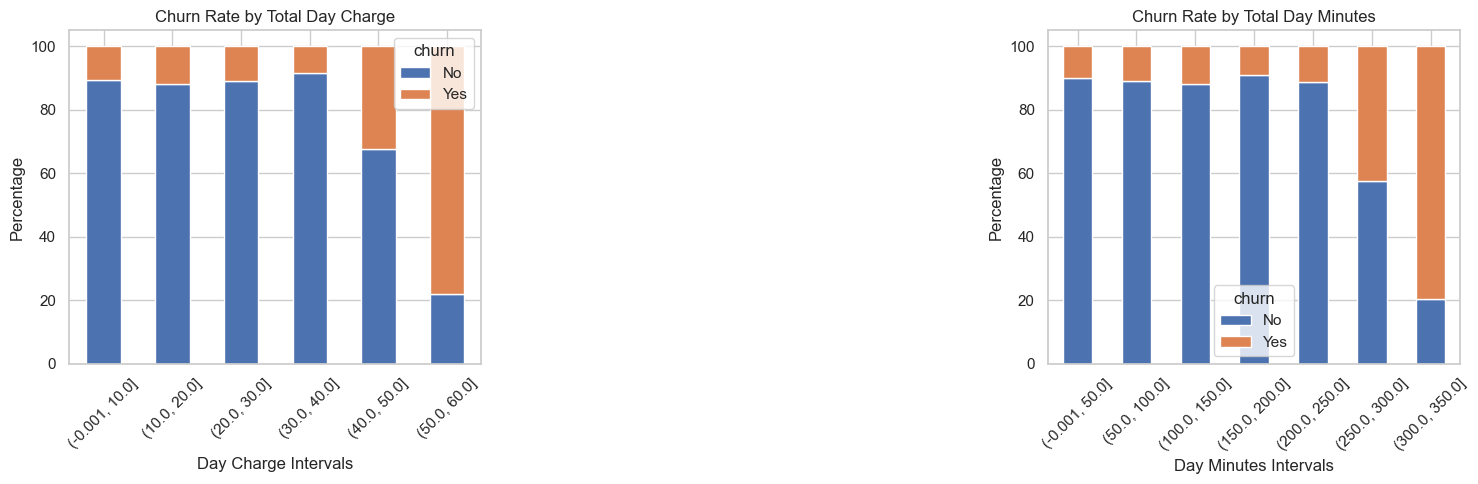

In [18]:
# Churn rate by total day charge and minutes
totaldaycharge_bins = pd.cut(telecom['totaldaycharge'], bins=[0, 10, 20, 30, 40, 50, 60], include_lowest=True)
churn_by_totaldaycharge = telecom.groupby(totaldaycharge_bins)['churn'].value_counts(normalize=True).unstack() * 100

totaldayminutes_bins = pd.cut(telecom['totaldayminutes'], bins=[0, 50, 100, 150, 200, 250, 300, 350], include_lowest=True)
churn_by_totaldayminutes = telecom.groupby(totaldayminutes_bins)['churn'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
churn_by_totaldaycharge.plot(kind='bar', stacked=True, ax=plt.gca()) 
plt.title('Churn Rate by Total Day Charge')
plt.ylabel('Percentage')
plt.xlabel('Day Charge Intervals')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
churn_by_totaldayminutes.plot(kind='bar', stacked=True, ax=plt.gca()) 
plt.title('Churn Rate by Total Day Minutes')
plt.ylabel('Percentage')
plt.xlabel('Day Minutes Intervals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This is a better way to visualize the correlation between Churn and the two variables. There is a tendency of leaving the company by those who spent more minutes during the day, the same ones that paid a more expensive bill.

C:\Users\laura\AppData\Local\Temp\ipykernel_7292\2187516411.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_numbercalls = telecom.groupby(numbercalls_bins)['churn'].value_counts(normalize=True).unstack() * 100
C:\Users\laura\AppData\Local\Temp\ipykernel_7292\2187516411.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intplan_by_numbercalls = telecom.groupby(numbercalls_bins)['internationalplan'].value_counts(normalize=True).unstack() * 100


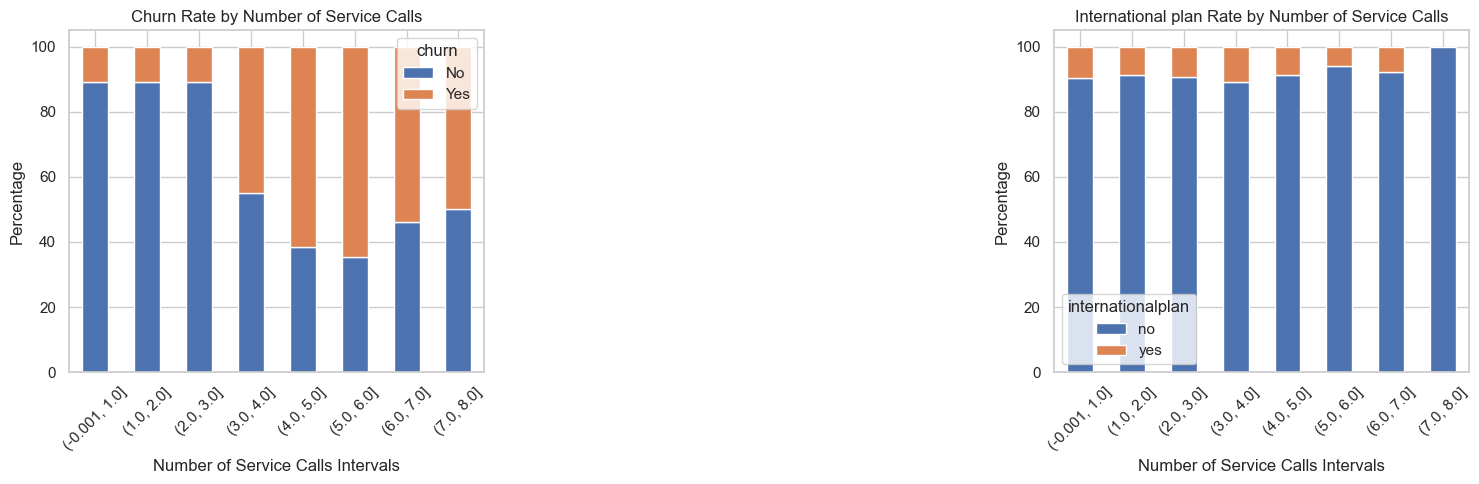

In [19]:
# Comparing churn with number os customer service calls
numbercalls_bins = pd.cut(telecom['numbercustomerservicecalls'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], include_lowest=True)
churn_by_numbercalls = telecom.groupby(numbercalls_bins)['churn'].value_counts(normalize=True).unstack() * 100

# International plan by number of customerservicecalls
numbercalls_bins = pd.cut(telecom['numbercustomerservicecalls'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], include_lowest=True)
intplan_by_numbercalls = telecom.groupby(numbercalls_bins)['internationalplan'].value_counts(normalize=True).unstack() * 100


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
intplan_by_numbercalls.plot(kind='bar', stacked=True, ax=plt.gca()) 
plt.title('International plan Rate by Number of Service Calls')
plt.ylabel('Percentage')
plt.xlabel('Number of Service Calls Intervals')
plt.xticks(rotation=45)

plt.subplot(1, 3, 1)
churn_by_numbercalls.plot(kind='bar', stacked=True, ax=plt.gca()) 
plt.title('Churn Rate by Number of Service Calls')
plt.ylabel('Percentage')
plt.xlabel('Number of Service Calls Intervals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The visualizations provide a detailed analysis of the churn rates in the dataset:

Churn Rate by Customer Service Calls: The bar chart shows a clear pattern. Customers with high number of service calls have a higher churn rate. Maybe the customer service provided it has not been satisfactory.
Or maybe, the company didn't or coudn't resolve the customers problems, resulting in them leaving.

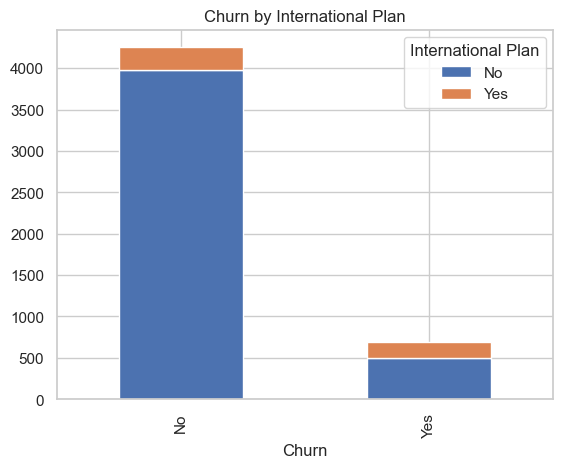

In [20]:
# Comparing churn by international plan

cross_tab = pd.crosstab(telecom['churn'], telecom['internationalplan'])
cross_tab.plot(kind='bar', stacked=True)

plt.title('Churn by International Plan')
plt.xlabel('Churn')
plt.legend(title='International Plan', labels=['No', 'Yes'], loc='upper right')
plt.show()

International plan could be an important feature for churn.

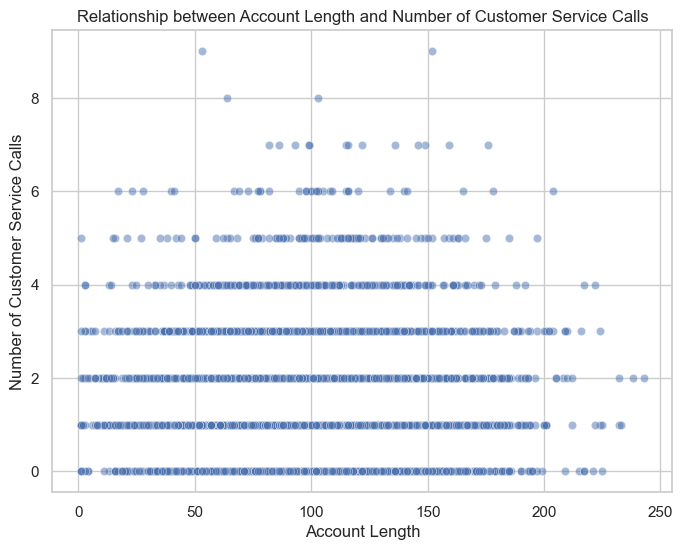

In [21]:
# Scatter plot to check if there is there any relationship between account length and customer service calls

plt.figure(figsize=(8, 6))
sns.scatterplot(x='accountlength', y='numbercustomerservicecalls', data=telecom, alpha=0.5)
plt.title('Relationship between Account Length and Number of Customer Service Calls')
plt.xlabel('Account Length')
plt.ylabel('Number of Customer Service Calls')
plt.grid(True)
plt.show()


# print(telecom_binary.isnull().sum())


The number of calls spreads evenly across the account lenght, except when we analize 7 or more calls, where those who called had an account lenght higher than 50

## 3. Data Preparation

In [22]:
# Nan values
nan_count = telecom.isnull().sum().sum()

# Check for NaN values column-wise
nan_count_columns = telecom.isnull().sum()

if nan_count > 0:
    print(f"There are {nan_count} NaN values in the DataFrame.")
    print("Column-wise NaN count:")
    print(nan_count_columns)
else:
    print("There are no NaN values in the DataFrame.")

There are 849 NaN values in the DataFrame.
Column-wise NaN count:
churn                          0
accountlength                 49
internationalplan             50
voicemailplan                 50
numbervmailmessages           50
totaldayminutes               50
totaldaycalls                 50
totaldaycharge                50
totaleveminutes               50
totalevecalls                 50
totalevecharge                50
totalnightminutes             50
totalnightcalls               50
totalnightcharge              50
totalintlminutes              50
totalintlcalls                50
totalintlcharge               50
numbercustomerservicecalls    50
dtype: int64


### Imputing NaN values

We opted to try to impute the missing data with some methods rather than excluding the rows with NaN values. Although 50 NaN per column seems a small number, when added together they make up for almost 1/5 of the data. For our model to be as precise as possible, we need to consider that data loss.

In [23]:
# Imputing with 0
telecom_zero = telecom_binary.copy(deep=True)
telecom_zero.fillna(0, inplace=True)
# print(telecom_binary.isnull().sum(), telecom_zero.isnull().sum())

In [24]:
# Imputing with KNN
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # Test different n
telecom_knn = pd.DataFrame(knn_imputer.fit_transform(telecom_binary), columns=telecom_binary.columns)

# print(telecom_binary.isnull().sum(), telecom_knn.isnull().sum())

print("Raw data: \n", telecom.iloc[:,5:9].describe(include="all"), "\n\n",
        "Imputed with KNN: \n", telecom_knn.iloc[:,5:9].describe(), "\n\n",
        "Imputed with zero: \n", telecom_zero.iloc[:,5:9].describe())

Raw data: 
        totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes
count      4950.000000    4950.000000     4950.000000      4950.000000
mean        180.306625     100.038788       30.629386       200.679798
std          53.926625      19.844529        9.148881        50.486434
min           0.000000       0.000000        0.000000         0.000000
25%         143.700000      87.000000       24.430000       166.425000
50%         180.100000     100.000000       30.600000       201.000000
75%         216.200000     113.000000       36.720000       234.100000
max         351.500000     165.000000       59.760000       363.700000 

 Imputed with KNN: 
        totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes
count      5000.000000    5000.000000     5000.000000      5000.000000
mean        180.303342     100.032520       30.638822       200.638196
std          53.725634      19.766251        9.148733        50.291799
min           0.000000       0.000000     

KNN with 5 neighbors seems like a good method for imputation.

## Calculating feature importance

In [25]:
from sklearn.ensemble import RandomForestClassifier

X = telecom_knn.drop("churn", axis=1)
y = telecom_knn['churn']

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)
feature_importances = clf.feature_importances_

for feature_name, importance in zip(X.columns, feature_importances):
       print(f"{feature_name}: {importance:.2f}")
       
# Feature importance seems to grow with the imputations compared to raw data

accountlength: 0.03
internationalplan: 0.09
voicemailplan: 0.02
numbervmailmessages: 0.03
totaldayminutes: 0.13
totaldaycalls: 0.03
totaldaycharge: 0.16
totaleveminutes: 0.06
totalevecalls: 0.02
totalevecharge: 0.07
totalnightminutes: 0.04
totalnightcalls: 0.03
totalnightcharge: 0.04
totalintlminutes: 0.04
totalintlcalls: 0.06
totalintlcharge: 0.04
numbercustomerservicecalls: 0.12


Based on the RandomForest Method: totaldayminutes and totaldaycharge seem to be the most important features for predicting churn, with high importance values of around 14% each.
Numbercustomerservicecalls also appears to be quite important, with an importance value of around 12%.
Other features like internationalplan, totaleveminutes, totalintlcalls, and others, also contribute to predicting churn but with lower importance values.
However in the correlation map it shows international plan as an important feature for predicting churn.

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. 
This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. 
We will see in the modelling section on how to avoid skewness in the data.

# 4. Modeling

### Logistic Regression

Accuracy: 0.871

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       865
         1.0       0.56      0.22      0.32       135

    accuracy                           0.87      1000
   macro avg       0.72      0.60      0.62      1000
weighted avg       0.84      0.87      0.85      1000

Logistic Regression Cross-Validation Accuracy: 0.87 (+/- 0.01)


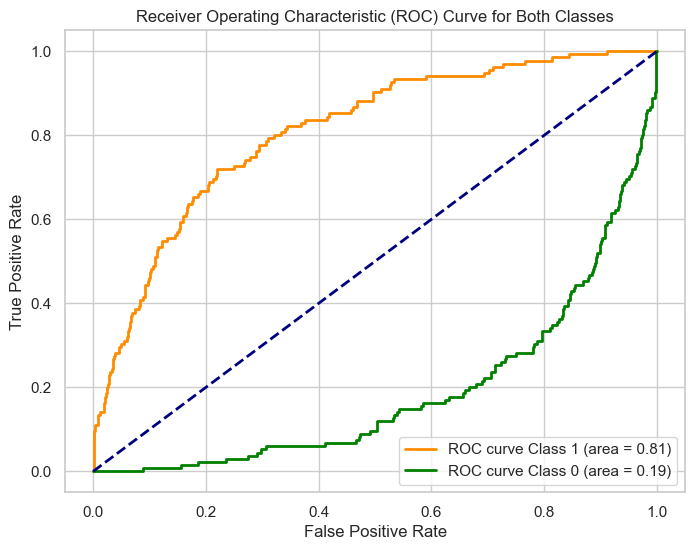

In [81]:
# Logistic regression with telecom_binary
## With this set we have all the data from the original set but the categorical columns were changed to boolean values
### We also have NaN present in this set. Let's first try to make the model as it is, and then try with different imputation methods.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Split the data into features (X) and the target variable (y)
X = telecom_knn.drop('churn', axis=1)
y = telecom_knn['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_log = train_test_split(X, y, test_size=0.2, random_state=666)
# Higher accuracy by changing test_size from 0.2 to 0.1. Normally it's good to have a bigger test size.
## Since we're going to use cross-validation in the future, we'll leave the test_size as it is for now.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

logistic_model = LogisticRegression(max_iter=5000, C=0.5, solver="lbfgs")
# Time to test multiple hyperparameters to see which performs best
# max_iter == Maximum number of iterations taken for the solvers to converge. With max_iter = 3.000 -> accuracy = 0.869 (with test_size = 0.2)
# C == Inverse of regularization strength, smaller values specify stronger regularization. With C = 0.5 -> accuracy = 0.87 (with test_size = 0.2)
# Solver == Algorithm to use in the optimization problem 

# Fit the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_log = logistic_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_log, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_log, y_pred_log))

### Cross validation ###
logistic_model_scores = cross_val_score(logistic_model, X_scaled, y, cv=10, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(logistic_model_scores.mean(), logistic_model_scores.std() * 2))

### Insert graphs below accuracy results ###
# ROC curve for better visualization of the model in the different classes

from sklearn.metrics import roc_curve, auc


### Extracting the y_score from the model to show both classes performance on ROC curve graph ###
y_score = logistic_model.predict_proba(X_test_scaled)

# ROC curve for Class 1
fpr1, tpr1, _ = roc_curve(y_test_log, y_score[:, 1])
roc_auc_log = auc(fpr1, tpr1)

# ROC curve for Class 0
fpr0, tpr0, _ = roc_curve(y_test_log, y_score[:, 0])
roc_auc0 = auc(fpr0, tpr0)

# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve Class 1 (area = {:.2f})'.format(roc_auc_log))
plt.plot(fpr0, tpr0, color='green', lw=2, label='ROC curve Class 0 (area = {:.2f})'.format(roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Both Classes')
plt.legend(loc="lower right")
plt.show()


Testing the same model but imputing NaN by 0 we got less accuracy, therefore, we opted to use the KNN imputation with the following models.

Testing with normalized data:

In [28]:
X = telecom_knn.drop('churn', axis=1)
y = telecom_knn['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# Standardize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=5000, C=0.5)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.871

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       865
         1.0       0.57      0.18      0.27       135

    accuracy                           0.87      1000
   macro avg       0.73      0.58      0.60      1000
weighted avg       0.84      0.87      0.84      1000



### K Neighbors Classifier

Accuracy: 0.905

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       865
         1.0       0.88      0.34      0.49       135

    accuracy                           0.91      1000
   macro avg       0.90      0.67      0.72      1000
weighted avg       0.90      0.91      0.89      1000

KNN Cross-Validation Accuracy: 0.90 (+/- 0.01)


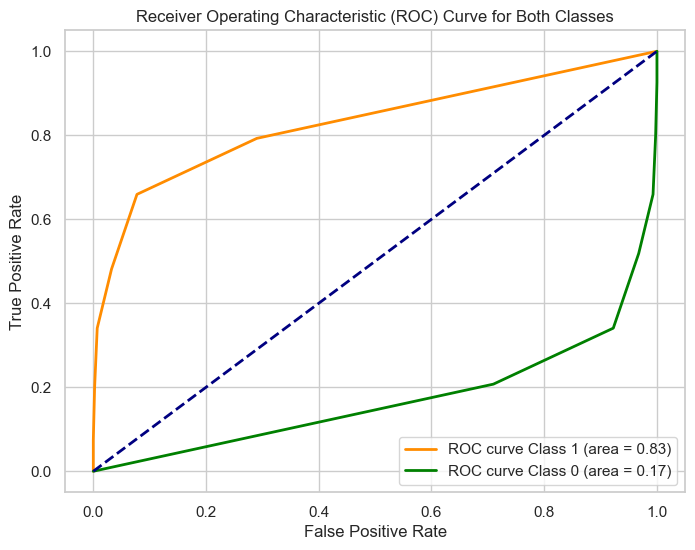

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_knn = telecom_knn.drop('churn', axis=1)
y_knn = telecom_knn['churn']

X_train_knn, X_test, y_train, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=666)

# Standardize the features
## Knn benefits a lot from standardization. We got a ROC curve area of 0.71 without standardization, compared to 0.83. As well as better precision
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_knn)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

#Tunning the hyperparameters for better results
from sklearn.model_selection import GridSearchCV # After messing with it manually we thought it'd be nice to try an automatization of the process
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [30, 50, 100]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_knn_model = grid_search.best_estimator_


knn_model = best_knn_model  # Apparently 5 has the higher accuracy comparing from 3 to 10
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test_knn, y_pred_knn))

### Cross validation ###
knn_model_scores = cross_val_score(knn_model, X_scaled, y_knn, cv=10, scoring='accuracy')
print("KNN Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(knn_model_scores.mean(), knn_model_scores.std() * 2))


### Insert graphs below accuracy results ###

y_score = knn_model.predict_proba(X_test_scaled)

# ROC curve for Class 1
fpr1, tpr1, _ = roc_curve(y_test_knn, y_score[:, 1])
roc_auc_knn = auc(fpr1, tpr1)

# ROC curve for Class 0
fpr0, tpr0, _ = roc_curve(y_test_knn, y_score[:, 0])
roc_auc0 = auc(fpr0, tpr0)

# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve Class 1 (area = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr0, tpr0, color='green', lw=2, label='ROC curve Class 0 (area = {:.2f})'.format(roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Both Classes')
plt.legend(loc="lower right")
plt.show()

Testing by imputing data with 0 we got less accuracy and less precision for class 1, which is very important for us. No improvements

Try normalizing the data

In [39]:
#KNN with normalized dataset
X = telecom_knn.drop('churn', axis=1)
y = telecom_knn['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.871

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       865
         1.0       0.57      0.18      0.27       135

    accuracy                           0.87      1000
   macro avg       0.73      0.58      0.60      1000
weighted avg       0.84      0.87      0.84      1000



With normalization we got less accuracy

### Support Vector Machine

Accuracy: 0.928

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       865
         1.0       0.83      0.59      0.69       135

    accuracy                           0.93      1000
   macro avg       0.88      0.78      0.82      1000
weighted avg       0.92      0.93      0.92      1000

SVM Cross-Validation Accuracy: 0.93 (+/- 0.02)


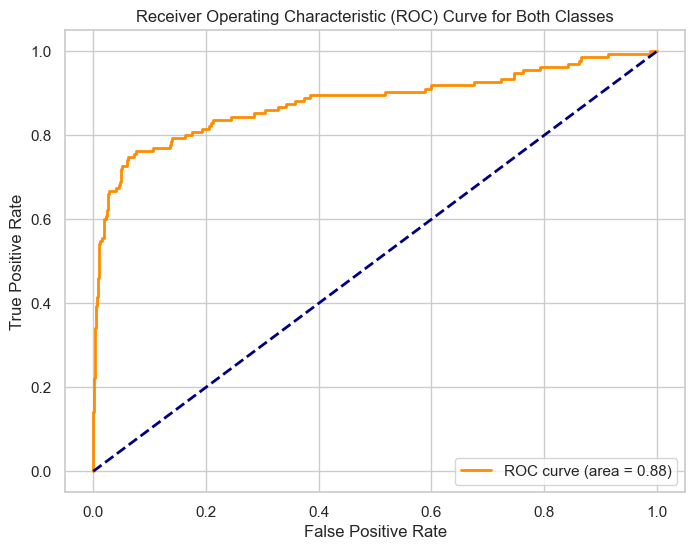

In [83]:

from sklearn.svm import SVC

X = telecom_knn.drop('churn', axis=1)
y = telecom_knn['churn']

X_train, X_test, y_train, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=666)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_standardized = scaler.transform(X)

svm_model = SVC(kernel='rbf', C=1.5)  # Experiment different kernels and hyperparameters

svm_model.fit(X_train_standardized, y_train)

y_pred_svm = svm_model.predict(X_test_standardized)

accuracy = accuracy_score(y_test_svm, y_pred_svm)
classification_rep = classification_report(y_test_svm, y_pred_svm)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

### Cross Validation ###
svm_model_scores = cross_val_score(svm_model, X_standardized, y, cv=10, scoring='accuracy')
print("SVM Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(svm_model_scores.mean(), svm_model_scores.std() * 2))


### Insert graphs below accuracy results ###

decision_values = svm_model.decision_function(X_test_standardized)

fpr, tpr, thresholds = roc_curve(y_test_svm, decision_values)
roc_auc_svm = auc(fpr, tpr) 

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Both Classes')
plt.legend(loc="lower right")
plt.show()


SVM with normalized data

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

### Cross Validation ###
svm_model_scores = cross_val_score(svm_model, X_scaled, y, cv=10, scoring='accuracy')
print("SVM Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(svm_model_scores.mean(), svm_model_scores.std() * 2))

Accuracy: 0.914

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       865
         1.0       0.81      0.47      0.60       135

    accuracy                           0.91      1000
   macro avg       0.87      0.73      0.77      1000
weighted avg       0.91      0.91      0.90      1000

SVM Cross-Validation Accuracy: 0.92 (+/- 0.01)


SVM performs a little bit worse with normalized data if compared to standardized.

### Neural Networks

Epoch 1/50
133/133 [==============================] - 2s 5ms/step - loss: 0.4891 - accuracy: 0.7892 - val_loss: 0.3805 - val_accuracy: 0.8693
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8567 - val_loss: 0.3591 - val_accuracy: 0.8693
Epoch 3/50
133/133 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.8574 - val_loss: 0.3518 - val_accuracy: 0.8747
Epoch 4/50
133/133 [==============================] - 1s 5ms/step - loss: 0.3536 - accuracy: 0.8633 - val_loss: 0.3269 - val_accuracy: 0.8720
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8631 - val_loss: 0.3239 - val_accuracy: 0.8760
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8656 - val_loss: 0.3246 - val_accuracy: 0.8627
Epoch 7/50
133/133 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8671 - val_loss: 0.3063 - val_accuracy: 0.8680
Epoch 

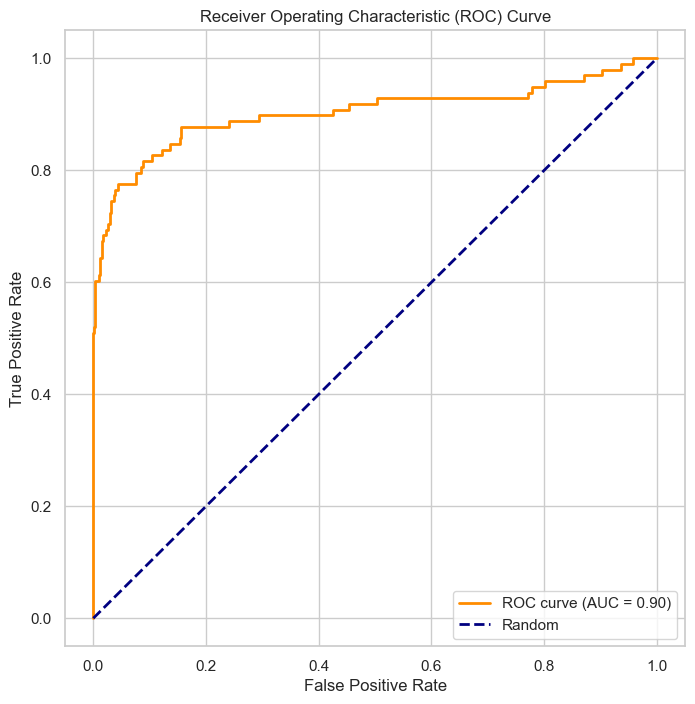

In [84]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X = telecom_knn.drop('churn', axis=1)
y = telecom_knn['churn']

X_train, X_test, y_train, y_test_nn = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardizing data for better convergence
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

model = Sequential()

# Input layer and hidden layers
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu')) # Each input is a vector of one dimension
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for binary classification). We thought about using 2 but one does the trick.
model.add(Dense(1, activation='sigmoid'))

# Compiling the model and choosing parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_nn))

loss, accuracy = model.evaluate(X_test_scaled, y_test_nn)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


### Pred values for graphical representation ###
y_pred_nn = model.predict(X_test_scaled)
# Convert probabilities to binary predictions using a threshold (0.5 in this case)
y_pred_binary = (y_pred_nn > 0.5).astype(int)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_nn, y_pred_nn)
roc_auc_nn = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

50 Epoch - telecom_binary (with NaN values), not standardized and not normalized:

    Test Loss: 0.40314704179763794, Test Accuracy: 0.8610000014305115

50 Epoch - telecom_knn (WITHOUT NaN values), not standardized and not normalized:

    Test Loss: 0.29968610405921936, Test Accuracy: 0.8830000162124634

50 Epoch - telecom_knn, standardized:

    Test Loss: 0.18518471717834473, Test Accuracy: 0.9409999847412109

500 Epoch - telecom_knn, standardized:

    Test Loss: 1.0098333358764648, Test Accuracy: 0.9279999732971191

1000 Epoch - telecom_knn, standardized:

    Test Loss: 1.532385230064392, Test Accuracy: 0.9240000247955322


50 Epoch - telecom_knn, normalized:

    Test Loss: 0.20472140610218048, Test Accuracy: 0.9330000281333923

500 Epoch - telecom_knn, normalized:

    Test Loss: 0.2104596197605133, Test Accuracy: 0.9520000219345093

1000 Epoch - telecom_knn, normalized:

    Test Loss: 0.4854535460472107, Test Accuracy: 0.9459999799728394

If we are striving for less data loss and higher accuracy, the best parameters would be using the normalized telecom_knn dataset

## Trying other models

### Bayesian Classifier

Accuracy: 0.861 

Bayesian Classifier Cross-Validation Accuracy: 0.87 (+/- 0.02)


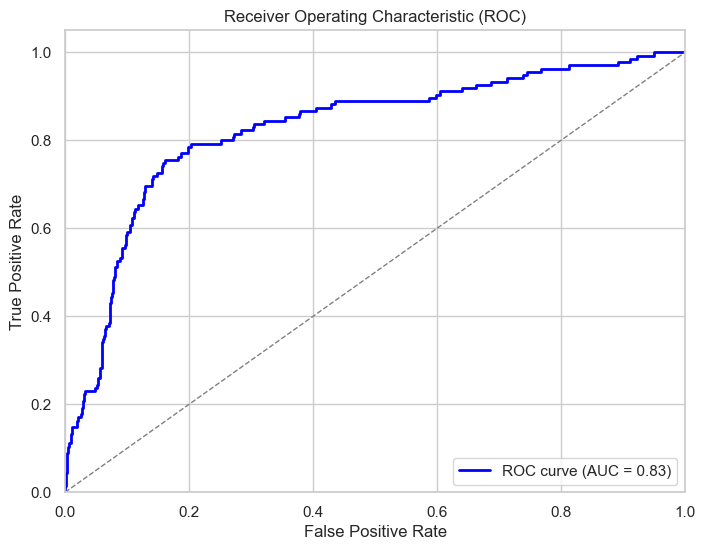

In [87]:
from sklearn.naive_bayes import GaussianNB

X = telecom_knn.drop('churn', axis=1)
y = telecom_knn['churn']

X_train, X_test, y_train, y_test_bc = train_test_split(X, y, test_size=0.2, random_state=666)

b_model = GaussianNB()
b_model.fit(X_train, y_train)

y_pred_bc = b_model.predict(X_test)

accuracy = accuracy_score(y_test_bc, y_pred_bc)
print(f"Accuracy: {accuracy} \n")

### Cross Validation ###
b_model_scores = cross_val_score(b_model, X, y, cv=10, scoring='accuracy')
print("Bayesian Classifier Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(b_model_scores.mean(), b_model_scores.std() * 2))

# Plot ROC curve
probs_bc = b_model.predict_proba(X_test)
probs_bc = probs_bc[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test_bc, probs_bc)
roc_auc_bc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_bc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

Accuracy: 0.926 

Decision Tree Cross-Validation Accuracy: 0.92 (+/- 0.03)


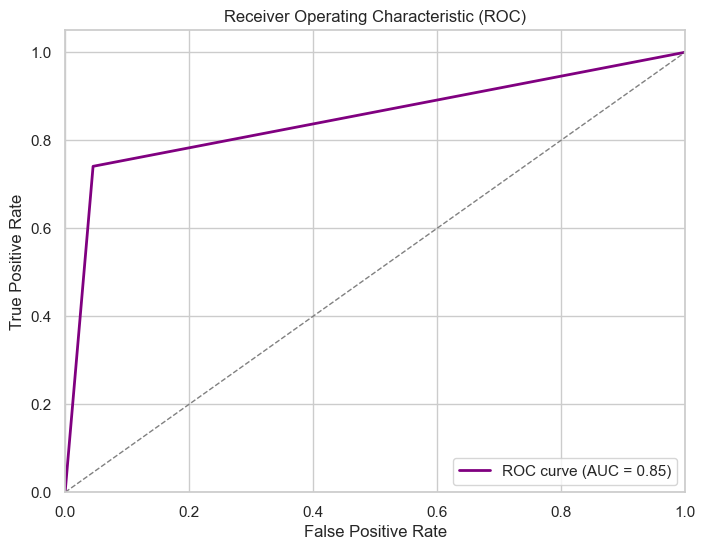

In [89]:
from sklearn.tree import DecisionTreeClassifier

X = telecom_knn.drop('churn', axis=1)
y = telecom_knn['churn']

X_train, X_test, y_train, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=666)

dt_model = DecisionTreeClassifier(random_state=42)  
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy = accuracy_score(y_test_dt, y_pred_dt)
print(f"Accuracy: {accuracy} \n")

### Cross Validation ###
dt_model_scores = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(dt_model_scores.mean(), dt_model_scores.std() * 2))

# Plot ROC curve
probs_dt = dt_model.predict_proba(X_test)
probs_dt = probs_dt[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test_dt, probs_dt)
roc_auc_dt = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Tree Ensembles (Random Forest)

Random Forest Accuracy: 0.954 

Random Forest Cross-Validation Accuracy: 0.96 (+/- 0.02)


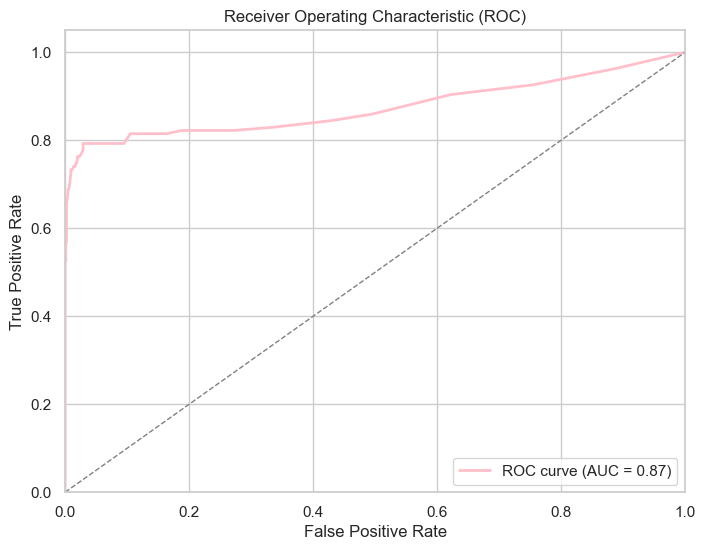

In [85]:
from sklearn.ensemble import RandomForestClassifier

X = telecom_knn.drop('churn', axis=1)
y = telecom_knn['churn']

X_train, X_test, y_train, y_test_te = train_test_split(X, y, test_size=0.2, random_state=666)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

y_pred_te = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test_te, y_pred_te)
print(f"Random Forest Accuracy: {accuracy_rf} \n")

### Number of iterations exceeded for cross validation with this method ###
rf_model_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(rf_model_scores.mean(), rf_model_scores.std() * 2))

# Plot ROC curve
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test_te, probs)
roc_auc_te = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_te)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



## 5. Evaluation and Main Conclusions

To perform our models we choose to use all the features due to the small size of the data. But understanding that in an optimization scenario we could only consider the significant columns.

Axes(0.125,0.11;0.775x0.77)


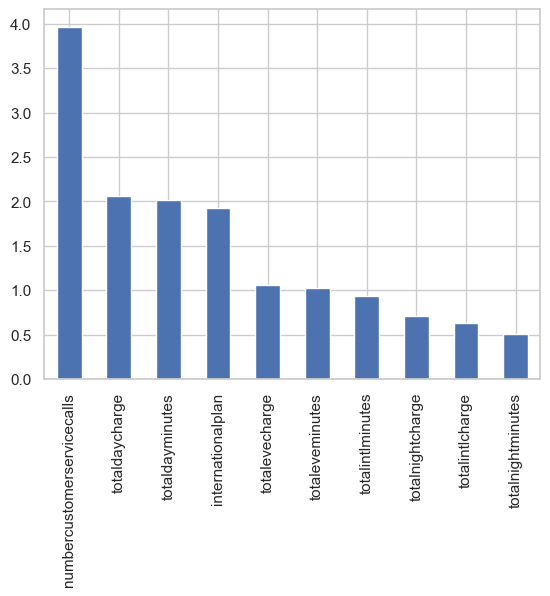

In [37]:

weights = pd.Series(logistic_model.coef_[0],index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Understanding factors leading to churn (such as customer behavior, usage patterns or interactions) helps identify commonalities among churners. Knowing the features that are more related to leaving is fundamental. For instance, in our data we saw some correlation between churn and number of service calls. Not only correlation, but also in some models, such as logistic regression, as the graphic show. The number of customer service calls was the feature with a lot of weight. Knowing that, the business can improve the customer experience and so on.
      
During our work we implemented several models that can helps us analize and predict the behaviour of the customers. The ability of predicting wether the client will leave the company is an amazing asset to the bussiness. 

### Graphical comparison of each model

Model Summary Table:
                        Accuracy  Precision    Recall  F1 Score  ROC Curve
Logistic Regression     0.871000   0.555556  0.222222  0.317460   0.809788
K Neighbors Classifier  0.905000   0.884615  0.340741  0.491979   0.828371
Support Vector Machine  0.928000   0.831579  0.585185  0.686957   0.879572
Neural Network          0.934667   0.752577  0.744898  0.748718   0.902936
Bayesian Classifier     0.861000   0.484615  0.466667  0.475472   0.827095
Decision Tree           0.926000   0.719424  0.740741  0.729927   0.847827
Tree Ensemble           0.861000   0.484615  0.466667  0.475472   0.874160


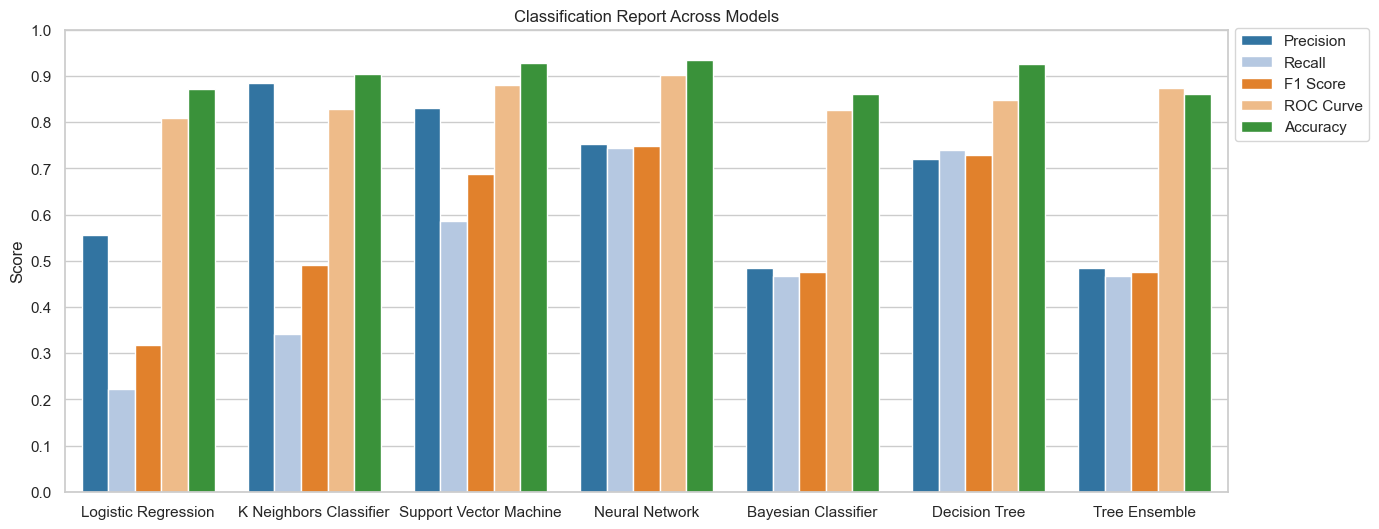

In [148]:
# Dictionary of trained models and its predictions
models = {
    'Logistic Regression': {'model': logistic_model, 'predictions': y_pred_log, 'y_test': y_test_log, 'roc_auc': roc_auc_log},
    'K Neighbors Classifier': {'model': knn_model, 'predictions': y_pred_knn, 'y_test': y_test_knn, 'roc_auc': roc_auc_knn},
    'Support Vector Machine': {'model': svm_model, 'predictions': y_pred_svm, 'y_test': y_test_svm, 'roc_auc': roc_auc_svm},
    'Neural Network': {'model': model, 'predictions': y_pred_binary, 'y_test': y_test_nn, 'roc_auc': roc_auc_nn},
    'Bayesian Classifier': {'model': b_model, 'predictions': y_pred_bc, 'y_test': y_test_bc, 'roc_auc': roc_auc_bc},
    'Decision Tree': {'model': dt_model, 'predictions': y_pred_dt, 'y_test': y_test_dt, 'roc_auc': roc_auc_dt},
    'Tree Ensemble': {'model': b_model, 'predictions': y_pred_bc, 'y_test': y_test_bc, 'roc_auc': roc_auc_te}

}

# Labels for y_test (isn't it all the same?)
true_labels = y_test

# Collect metrics
### Get precision, recall and f1
results = {}
for name, model_info in models.items():
    predictions = model_info['predictions']
    y_test = model_info['y_test']
    class_ = '1.0' # Getting summary for po
    class_report = classification_report(y_test, predictions, output_dict=True)
    # print(class_report)
    accuracy = class_report['accuracy']
    precision = class_report[class_]['precision']
    recall = class_report[class_]['recall']
    f1 = class_report[class_]['f1-score']
    roc = model_info['roc_auc']

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC Curve': roc
    }

# Model Summary Table
metrics_table = pd.DataFrame(results).T
print("Model Summary Table:")
print(metrics_table)

# Stacked Bar Chart
# plt.figure(figsize=(12, 6))
# sns.barplot(x=metrics_table.index, y=metrics_table['Accuracy'], color='skyblue', label='Accuracy')
# sns.barplot(x=metrics_table.index, y=metrics_table['Precision'], color='orange', label='Precision')
# sns.barplot(x=metrics_table.index, y=metrics_table['Recall'], color='green', label='Recall')
# sns.barplot(x=metrics_table.index, y=metrics_table['F1 Score'], color='red', label='F1 Score')

# Aggregated Bar Chart
plot_data = pd.melt(metrics_table.reset_index(), id_vars='index', var_name='Metric', value_name='Score')

metric_order = ['Precision', 'Recall', 'F1 Score', 'ROC Curve','Accuracy']
plot_data['Metric'] = pd.Categorical(plot_data['Metric'], categories=metric_order, ordered=True)

plt.figure(figsize=(15, 6))
sns.barplot(x='index', y='Score', hue='Metric', data=plot_data, palette='tab20')
plt.title('Classification Report Across Models')
plt.ylabel('Score')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

After testing various models, we have found that the model that provides the best accuracy is the Neural Network therefore the best model in this case. Despite other models also performed quite well. The accuracy is important because computes how many times a model made a correct prediction across the entire dataset. However, the F1 is quite important as well. Because it combines precision and recall, therefore Neural Network again performed very well in this case.
     

Some important lessons is that: data quality is extremely important, the pre processing data is a fundamental step for modelling. Understanding the data is also crucial. Models are unique and not universal, there is not one best model, different models have positives and negatives. Evatuation metrics is also essential.

The results obtained from our work have revealed several potential models like Decision Trees, Neural Networks, KNearest Neighbors, Support Vector Machines (SVM), Naive Bayes... showing their capabilities to predict the success criteria of our business. 
Working with a real-world data and problems for application scenarios has been an enlightening experience, offering an opportunity to go deep into various techniques and best practices with Data Science.